In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv(r'C:\Users\nayan\OneDrive\Desktop\model\diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
x = data.iloc[:,:-1].values
y = data.iloc[:,8].values

In [4]:
#Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder_y = LabelEncoder()
y=label_encoder_y.fit_transform(y)

In [5]:
from sklearn.model_selection import train_test_split
x_train , x_test  ,y_train , y_test= train_test_split(x , y , test_size = 0.25 , random_state = 0) 

In [6]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()


In [7]:
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

In [8]:
#Fitting logistic regression model with sklearn package

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)


In [10]:
classifier.fit(x_train , y_train)

LogisticRegression(random_state=0)

In [11]:
#Prediction
pred1 = classifier.predict(x_test)


In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , pred1)

In [13]:
cm

array([[117,  13],
       [ 26,  36]], dtype=int64)

In [14]:
#tp - 118b
#tn - 36
#fp - 26
#fn - 13

In [15]:
(118+36)/192

0.8020833333333334

In [ ]:
#using stats model

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train_s , x_test_s , y_train_s , y_test_s = train_test_split(x,y,test_size = 0.25,random_state=0)

In [19]:
from sklearn.preprocessing import StandardScaler
sc_x_s = StandardScaler()

In [20]:
x_train_s = sc_x_s.fit_transform(x_train_s)
x_test_s = sc_x_s.fit_transform(x_test_s)

In [21]:
#Adding  one extra column

In [22]:
import statsmodels.api as sm
x_train_s = sm.add_constant(x_train_s)
x_test_s = sm.add_constant(x_test_s)

In [23]:
import statsmodels.api as smf
classifier2 = smf.Logit(y_train_s, x_train_s).fit()

Optimization terminated successfully.
         Current function value: 0.482517
         Iterations 6


In [24]:
classifier2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  576
Model:                          Logit   Df Residuals:                      567
Method:                           MLE   Df Model:                            8
Date:                Sat, 01 Jun 2024   Pseudo R-squ.:                  0.2600
Time:                        11:21:42   Log-Likelihood:                -277.93
converged:                       True   LL-Null:                       -375.58
Covariance Type:            nonrobust   LLR p-value:                 6.246e-38
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8156      0.110     -7.414      0.000      -1.031      -0.600
x1             0.2976      0.122      2.448      0.014       0.059       0.536
x2             1.0517      0.135      7.802      0.000       0.787       1.316
x3            -0.2127      0.117     -1.815      0.070      -0.442       0.017
x4             0.0943      0.129      0.728      0.466      -0.159       0.348
x5            -0.1207      0.119     -1.011      0.312      -0.355       0.113
x6             0.6998      0.137      5.103      0.000       0.431       0.969
x7             0.2967      0.114      2.613      0.009       0.074       0.519
x8             0.2642      0.129      2.049      0.040       0.012       0.517
==============================================================================
"""

In [25]:
pred2 = classifier2.predict(x_test_s)


In [26]:
pred2
#converting pred2 to int , bcz it gices probability
pred2 = (pred2>0.5).astype(int)

In [27]:
pred2

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [28]:
cm2 = confusion_matrix(y_test_s , pred2)

In [29]:
cm2

array([[117,  13],
       [ 25,  37]], dtype=int64)

In [30]:
classifier2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  576
Model:                          Logit   Df Residuals:                      567
Method:                           MLE   Df Model:                            8
Date:                Sat, 01 Jun 2024   Pseudo R-squ.:                  0.2600
Time:                        11:21:43   Log-Likelihood:                -277.93
converged:                       True   LL-Null:                       -375.58
Covariance Type:            nonrobust   LLR p-value:                 6.246e-38
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8156      0.110     -7.414      0.000      -1.031      -0.600
x1             0.2976      0.122      2.448      0.014       0.059       0.536
x2             1.0517      0.135      7.802      0.000       0.787       1.316
x3            -0.2127      0.117     -1.815      0.070      -0.442       0.017
x4             0.0943      0.129      0.728      0.466      -0.159       0.348
x5            -0.1207      0.119     -1.011      0.312      -0.355       0.113
x6             0.6998      0.137      5.103      0.000       0.431       0.969
x7             0.2967      0.114      2.613      0.009       0.074       0.519
x8             0.2642      0.129      2.049      0.040       0.012       0.517
==============================================================================
"""

In [31]:
#AIC SCORE
#AIC  = -2 (Log-Likelihood) + 2(Number pf variables in model)
#Akaike Information Criterion 

In [32]:
aic_1 = -2*(-277.93) + 2*(8)
aic_1

571.86

In [33]:
#making optimum model
x_opt =  x_train_s[:,[0,1,2,3,4,5,6,7,8]]


In [34]:
classifier_b = smf.Logit(y_train_s, x_opt).fit()
classifier_b.summary()

Optimization terminated successfully.
         Current function value: 0.482517
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  576
Model:                          Logit   Df Residuals:                      567
Method:                           MLE   Df Model:                            8
Date:                Sat, 01 Jun 2024   Pseudo R-squ.:                  0.2600
Time:                        11:21:44   Log-Likelihood:                -277.93
converged:                       True   LL-Null:                       -375.58
Covariance Type:            nonrobust   LLR p-value:                 6.246e-38
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8156      0.110     -7.414      0.000      -1.031      -0.600
x1             0.2976      0.122      2.448      0.014       0.059       0.536
x2             1.0517      0.135      7.802      0.000       0.787       1.316
x3            -0.2127      0.117     -1.815      0.070      -0.442       0.017
x4             0.0943      0.129      0.728      0.466      -0.159       0.348
x5            -0.1207      0.119     -1.011      0.312      -0.355       0.113
x6             0.6998      0.137      5.103      0.000       0.431       0.969
x7             0.2967      0.114      2.613      0.009       0.074       0.519
x8             0.2642      0.129      2.049      0.040       0.012       0.517
==============================================================================
"""

In [35]:
cm2

array([[117,  13],
       [ 25,  37]], dtype=int64)

In [36]:
#missclassification - 38

In [37]:
#step2

In [38]:
x_opt =  x_train_s[:,[0,1,2,3,5,6,7,8]]
classifier_b = smf.Logit(y_train_s, x_opt).fit()
classifier_b.summary()

Optimization terminated successfully.
         Current function value: 0.482980
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  576
Model:                          Logit   Df Residuals:                      568
Method:                           MLE   Df Model:                            7
Date:                Sat, 01 Jun 2024   Pseudo R-squ.:                  0.2593
Time:                        11:21:44   Log-Likelihood:                -278.20
converged:                       True   LL-Null:                       -375.58
Covariance Type:            nonrobust   LLR p-value:                 1.472e-38
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8163      0.110     -7.423      0.000      -1.032      -0.601
x1             0.3015      0.121      2.491      0.013       0.064       0.539
x2             1.0360      0.132      7.823      0.000       0.776       1.296
x3            -0.1971      0.115     -1.714      0.087      -0.422       0.028
x4            -0.0837      0.108     -0.775      0.438      -0.295       0.128
x5             0.7321      0.130      5.621      0.000       0.477       0.987
x6             0.3030      0.114      2.668      0.008       0.080       0.526
x7             0.2485      0.127      1.961      0.050       0.000       0.497
==============================================================================
"""

In [39]:
aic_2 = -2*(-278.20) + 2*(7)
aic_2

570.4

In [40]:
pred_3 = classifier_b.predict(x_test_s[:,[0,1,2,3,5,6,7,8]])
#
pred_3 = (pred_3>0.5).astype(int)

In [41]:
cm3 = confusion_matrix(y_test_s,pred_3)
cm3

array([[117,  13],
       [ 24,  38]], dtype=int64)

In [42]:
#Misclassification - 37

In [43]:
#step3
x_opt =  x_train_s[:,[0,1,2,3,6,7,8]]
classifier_b = smf.Logit(y_train_s, x_opt).fit()
classifier_b.summary()

Optimization terminated successfully.
         Current function value: 0.483499
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  576
Model:                          Logit   Df Residuals:                      569
Method:                           MLE   Df Model:                            6
Date:                Sat, 01 Jun 2024   Pseudo R-squ.:                  0.2585
Time:                        11:21:45   Log-Likelihood:                -278.50
converged:                       True   LL-Null:                       -375.58
Covariance Type:            nonrobust   LLR p-value:                 3.304e-39
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8174      0.110     -7.434      0.000      -1.033      -0.602
x1             0.3033      0.121      2.510      0.012       0.067       0.540
x2             1.0048      0.125      8.011      0.000       0.759       1.251
x3            -0.1987      0.115     -1.736      0.083      -0.423       0.026
x4             0.7232      0.129      5.594      0.000       0.470       0.977
x5             0.2926      0.113      2.593      0.010       0.071       0.514
x6             0.2625      0.126      2.091      0.037       0.016       0.509
==============================================================================
"""

In [44]:
aic_3 =  -2*(-278.0) + 2*(6)
aic_3 , aic_2 , aic_1


(568.0, 570.4, 571.86)

In [45]:
pred_4 = classifier_b.predict(x_test_s[:,[0,1,2,3,6,7,8]])
#
pred_4 = (pred_4>0.5).astype(int)

In [46]:
cm4 = confusion_matrix(y_test_s,pred_4)
cm4

array([[117,  13],
       [ 25,  37]], dtype=int64)

In [48]:
#missclassification is more in step 3 compared to step 2.Make model in step 2 as final model..dont remove insulin
#final_model

In [49]:
x_opt =  x_train_s[:,[0,1,2,3,5,6,7,8]]
classifier_b = smf.Logit(y_train_s, x_opt).fit()
classifier_b.summary()

Optimization terminated successfully.
         Current function value: 0.482980
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  576
Model:                          Logit   Df Residuals:                      568
Method:                           MLE   Df Model:                            7
Date:                Sat, 01 Jun 2024   Pseudo R-squ.:                  0.2593
Time:                        11:22:03   Log-Likelihood:                -278.20
converged:                       True   LL-Null:                       -375.58
Covariance Type:            nonrobust   LLR p-value:                 1.472e-38
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8163      0.110     -7.423      0.000      -1.032      -0.601
x1             0.3015      0.121      2.491      0.013       0.064       0.539
x2             1.0360      0.132      7.823      0.000       0.776       1.296
x3            -0.1971      0.115     -1.714      0.087      -0.422       0.028
x4            -0.0837      0.108     -0.775      0.438      -0.295       0.128
x5             0.7321      0.130      5.621      0.000       0.477       0.987
x6             0.3030      0.114      2.668      0.008       0.080       0.526
x7             0.2485      0.127      1.961      0.050       0.000       0.497
==============================================================================
"""

In [50]:
pred_3 = classifier_b.predict(x_test_s[:,[0,1,2,3,5,6,7,8]])
#
pred_3 = (pred_3>0.5).astype(int)

In [51]:
cm3 = confusion_matrix(y_test_s,pred_3)
cm3

array([[117,  13],
       [ 24,  38]], dtype=int64)

In [52]:
pd.crosstab(y_test_s,pred_3,rownames= ['True'],colnames = ['Predicted'],margins=True)

Predicted,0,1,All
True,,,
0,117,13,130
1,24,38,62
All,141,51,192


In [ ]:
#[Tp Fn
#FP  FN]

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
#ROC CURVE to cange threshold

In [55]:
from sklearn.metrics import confusion_matrix , roc_curve ,roc_auc_score

In [59]:
pred_r = classifier_b.predict(x_train_s[:,[0,1,2,3,5,6,7,8]])#roc is done on training set

In [60]:
fpr , tpr , threshold = roc_curve(y_true = y_train_s ,y_score = pred_r , drop_intermediate = False)

In [64]:
import matplotlib.collections

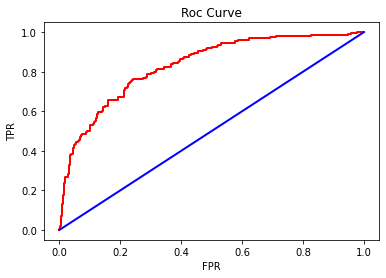

In [66]:
plt.figure()
#add roc
plt.plot(fpr , tpr ,lw =2 ,color = 'red')

#random tpr and fpr limits
plt.plot([0,1],[0,1],lw=2 , color = 'blue')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("Roc Curve")
plt.show()

In [67]:
#Area under the curve
roc_auc_score(y_true = y_train_s ,y_score = pred_r)

0.8312647599055366